In [735]:
from master_thesis.src import models, utils, data
import scipy.stats as st
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [736]:
def compare(true, pred, scatter = True):
    if scatter == True:
        plt.scatter(true, pred, alpha = 0.05)
        plt.xlabel('True')
        plt.ylabel('Predictions')
        plt.axis('equal')
        plt.axis('square')
        plt.xlim(0,600)
        plt.ylim(0,600)
        plt.show()
        
    pearson = st.pearsonr(true, pred)[0]  
    spearman = st.spearmanr(true, pred)[0]    
    
    if not np.isnan(pearson): # if array is constant (mean baseline)
        pearson = pearson.round(3)
    if not np.isnan(spearman):
        spearman = spearman.round(3)  
    
    rt = {"Pearson": pearson,
          "Spearman": spearman,
          "MAE": mean_absolute_error(true, pred).round(2),
          "MSE": mean_squared_error(true, pred).round(1),
          "RAE": utils.relative_absolute_error(np.array(pred), np.array(true)).round(2)
         }
    
    return rt

In [737]:
PATH_predictions = utils.OUTPUT / "predictions"

In [738]:
print(PATH_predictions)

/home/ruecker/workspace/master_thesis/master_thesis/outputs/predictions


In [748]:
models_dict = {
'BertFFN': 'BertFFN_FIXLEN512_MINLENNone_START0_EP30_BS32_LR1e-05_avgTimeOnPage_NOZ_2021-03-03_00:13:33.tsv',
'BertAveraging': 'BertAveraging_FIXLEN512_MINLENNone_START0_EP30_BS32_LR1e-05_avgTimeOnPage_NOZ_2021-03-31_16:45:24.tsv',
'BertSequence': 'BertSequence_FIXLEN128_MINLENNone_START0_EP25_BS5_LR0.0001_avgTimeOnPage_NOZ.tsv',
    #'BertSequence_FIXLEN512_MINLENNone_START0_EP30_BS32_LR1e-05_avgTimeOnPage_NOZ_2021-05-04_19:04:19.tsv',
    
'BertTextlength': 'BertTextlength_FIXLEN512_MINLENNone_START0_EP40_BS32_LR1e-05_avgTimeOnPage_NOZ_2021-04-27_11:37:43.tsv',
    
'BertHiM400': 'BertHierarchical_SECTIONSIZE400_MAX_SECT6_EP100_BS32_LR1e-05_avgTimeOnPage_NOZ_weighted_mean_2021-04-02_12:07:01.tsv',
'BertHiM512': 'BertHierarchical_SECTIONSIZE512_MAX_SECT5_EP100_BS32_LR1e-05_avgTimeOnPage_NOZ_weighted_mean_2021-04-08_15:29:27.tsv',
'BertHiM512pre': 'BertHierarchical_SECTIONSIZE512_MAX_SECT5_EP50_BS32_LR1e-05_avgTimeOnPage_NOZ_weighted_mean_pretrained_2021-04-19_12:21:17.tsv',
    
'BertHiGRU400': 'BertHierarchicalRNN_SECTIONSIZE400_MAX_SECT6_EP50_BS32_LR1e-05_avgTimeOnPage_NOZ_GRU_2021-04-04_11:35:50.tsv',
'BertHiGRU512': 'BertHierarchicalRNN_SECTIONSIZE512_MAX_SECT5_EP50_BS32_LR1e-05_avgTimeOnPage_NOZ_GRU_2021-04-14_11:14:43.tsv',
'BertHiGRU512pre': 'BertHierarchicalRNN_SECTIONSIZE512_MAX_SECT5_EP50_BS32_LR1e-05_avgTimeOnPage_NOZ_GRU_pretrained_2021-04-20_23:07:20.tsv',

'CNN800': 'CNN_FIXLEN800_MINLENNone_START0_EP50_BS32_LR0.0002_avgTimeOnPage_NOZ_2021-03-10_10:15:33.tsv',
    
'BertEmbsFFN': 'BertEmbs_FIXLEN512_MINLENNone_START0_EP60_BS32_LR0.001_avgTimeOnPage_NOZ_2021-05-04_14:13:11.tsv',
'DANFFN': 'DANFastText_EP60_BS32_LR0.001_avgTimeOnPage_NOZ_2021-05-04_16:53:59.tsv',
    
'DANRidge': 'EmbsRidge.tsv',
'BertEmbsRidge': 'BertFeaturesRidge.tsv',
    
'BaselineTextlength': 'textlength_baseline.tsv',
'BaselineMean': 'mean_baseline.tsv',
    
'BOWRidge': 'BOW_ridge_abs_1000.tsv'
}



In [749]:
columns = pd.MultiIndex.from_product([['dev', 'test'], ["Pearson", "Spearman", "MSE", "MAE", "RAE"]],
                                     names=['set', 'metric'])

In [750]:
results = pd.DataFrame(data=0., index = models_dict.keys(), columns = columns)

In [751]:
results

set                    dev                            test                     \
metric             Pearson Spearman  MSE  MAE  RAE Pearson Spearman  MSE  MAE   
BertFFN                0.0      0.0  0.0  0.0  0.0     0.0      0.0  0.0  0.0   
BertAveraging          0.0      0.0  0.0  0.0  0.0     0.0      0.0  0.0  0.0   
BertSequence           0.0      0.0  0.0  0.0  0.0     0.0      0.0  0.0  0.0   
BertTextlength         0.0      0.0  0.0  0.0  0.0     0.0      0.0  0.0  0.0   
BertHiM400             0.0      0.0  0.0  0.0  0.0     0.0      0.0  0.0  0.0   
BertHiM512             0.0      0.0  0.0  0.0  0.0     0.0      0.0  0.0  0.0   
BertHiM512pre          0.0      0.0  0.0  0.0  0.0     0.0      0.0  0.0  0.0   
BertHiGRU400           0.0      0.0  0.0  0.0  0.0     0.0      0.0  0.0  0.0   
BertHiGRU512           0.0      0.0  0.0  0.0  0.0     0.0      0.0  0.0  0.0   
BertHiGRU512pre        0.0      0.0  0.0  0.0  0.0     0.0      0.0  0.0  0.0   
CNN800                 0.0      0.0  0.0  0.0  0.0     0.0      0.0  0.0  0.0   
BertEmbsFFN            0.0      0.0  0.0  0.0  0.0     0.0      0.0  0.0  0.0   
DANFFN                 0.0      0.0  0.0  0.0  0.0     0.0      0.0  0.0  0.0   
DANRidge               0.0      0.0  0.0  0.0  0.0     0.0      0.0  0.0  0.0   
BertEmbsRidge          0.0      0.0  0.0  0.0  0.0     0.0      0.0  0.0  0.0   
BaselineTextlength     0.0      0.0  0.0  0.0  0.0     0.0      0.0  0.0  0.0   
BaselineMean           0.0      0.0  0.0  0.0  0.0     0.0      0.0  0.0  0.0   
BOWRidge               0.0      0.0  0.0  0.0  0.0     0.0      0.0  0.0  0.0   

set                      
metric              RAE  
BertFFN             0.0  
BertAveraging       0.0  
BertSequence        0.0  
BertTextlength      0.0  
BertHiM400          0.0  
BertHiM512          0.0  
BertHiM512pre       0.0  
BertHiGRU400        0.0  
BertHiGRU512        0.0  
BertHiGRU512pre     0.0  
CNN800              0.0  
BertEmbsFFN         0.0  
DANFFN              0.0  
DANRidge            0.0  
BertEmbsRidge       0.0  
BaselineTextlength  0.0  
BaselineMean        0.0  
BOWRidge            0.0

In [752]:
for name, identifier in models_dict.items():
    print(name)
    pred_dev = pd.read_csv(PATH_predictions / "dev" / identifier, index_col = 0, sep = '\t')
    pred_test = pd.read_csv(PATH_predictions / "test" / identifier, index_col = 0, sep = '\t')
    
    print(pred_dev.loc["NOZ_2014740"])
    print(pred_test.loc["NOZ_1847617"])
    
    rt_dev = compare(pred_dev.true, pred_dev.pred, scatter = False)
    rt_test = compare(pred_test.true, pred_test.pred, scatter = False)
    
    print(rt_dev)
    print(rt_test)
    
    for key, value in rt_dev.items():
        results.loc[name, "dev"][key] = value
        
    for key, value in rt_test.items():
        results.loc[name, "test"][key] = value

    print("--------")

BertFFN
true    202.0566
pred    158.2319
Name: NOZ_2014740, dtype: float64
true    208.8209
pred    244.3113
Name: NOZ_1847617, dtype: float64
{'Pearson': 0.695, 'Spearman': 0.558, 'MAE': 54.66, 'MSE': 10397.0, 'RAE': 76.69}
{'Pearson': 0.624, 'Spearman': 0.599, 'MAE': 49.86, 'MSE': 7959.2, 'RAE': 76.59}
--------
BertAveraging
true    202.0566
pred    147.2523
Name: NOZ_2014740, dtype: float64
true    208.8209
pred    205.1047
Name: NOZ_1847617, dtype: float64
{'Pearson': 0.678, 'Spearman': 0.569, 'MAE': 54.39, 'MSE': 10737.6, 'RAE': 76.32}
{'Pearson': 0.604, 'Spearman': 0.607, 'MAE': 50.34, 'MSE': 8529.3, 'RAE': 77.32}
--------
BertSequence
true    202.0566
pred    186.8477
Name: NOZ_2014740, dtype: float64
true    208.8209
pred    186.8477
Name: NOZ_1847617, dtype: float64
{'Pearson': nan, 'Spearman': nan, 'MAE': 70.47, 'MSE': 19526.2, 'RAE': 98.88}
{'Pearson': nan, 'Spearman': nan, 'MAE': 66.22, 'MSE': 12803.4, 'RAE': 101.72}
--------
BertTextlength
true    202.0566
pred    149.756

/home/ruecker/miniconda3/envs/GPU/lib/python3.7/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/ruecker/miniconda3/envs/GPU/lib/python3.7/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
/home/ruecker/miniconda3/envs/GPU/lib/python3.7/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/ruecker/miniconda3/envs/GPU/lib/python3.7/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())



DANFFN
true    202.0566
pred    145.2645
Name: NOZ_2014740, dtype: float64
true    208.8209
pred    218.3995
Name: NOZ_1847617, dtype: float64
{'Pearson': 0.532, 'Spearman': 0.434, 'MAE': 64.12, 'MSE': 14004.5, 'RAE': 89.96}
{'Pearson': 0.531, 'Spearman': 0.438, 'MAE': 58.25, 'MSE': 9217.0, 'RAE': 89.48}
--------
DANRidge
true    202.056604
pred    187.304183
Name: NOZ_2014740, dtype: float64
true    208.820896
pred    205.945674
Name: NOZ_1847617, dtype: float64
{'Pearson': 0.365, 'Spearman': 0.326, 'MAE': 68.41, 'MSE': 16953.6, 'RAE': 95.99}
{'Pearson': 0.374, 'Spearman': 0.325, 'MAE': 62.57, 'MSE': 11001.9, 'RAE': 96.11}
--------
BertEmbsRidge
true    202.056604
pred    169.780085
Name: NOZ_2014740, dtype: float64
true    208.820896
pred    253.925334
Name: NOZ_1847617, dtype: float64
{'Pearson': 0.514, 'Spearman': 0.467, 'MAE': 66.51, 'MSE': 14379.2, 'RAE': 93.32}
{'Pearson': 0.512, 'Spearman': 0.476, 'MAE': 60.73, 'MSE': 9592.6, 'RAE': 93.29}
--------
BaselineTextlength
true    2

/home/ruecker/miniconda3/envs/GPU/lib/python3.7/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/ruecker/miniconda3/envs/GPU/lib/python3.7/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
/home/ruecker/miniconda3/envs/GPU/lib/python3.7/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/ruecker/miniconda3/envs/GPU/lib/python3.7/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


In [753]:
results.loc[:, "test"]["Pearson"]

BertFFN               0.624
BertAveraging         0.604
BertSequence            NaN
BertTextlength        0.657
BertHiM400            0.627
BertHiM512            0.643
BertHiM512pre         0.657
BertHiGRU400          0.655
BertHiGRU512          0.645
BertHiGRU512pre       0.657
CNN800                0.476
BertEmbsFFN           0.572
DANFFN                0.531
DANRidge              0.374
BertEmbsRidge         0.512
BaselineTextlength    0.401
BaselineMean            NaN
BOWRidge              0.427
Name: Pearson, dtype: float64

In [754]:
# hier nach Pearson auf test-Set sortiert
results_sorted = results.sort_values([('test', 'Pearson')], ascending=True, na_position= 'first')
results_sorted

set                    dev                                    test           \
metric             Pearson Spearman      MSE    MAE    RAE Pearson Spearman   
BertSequence           NaN      NaN  19526.2  70.47  98.88     NaN      NaN   
BaselineMean           NaN      NaN  19533.4  70.21  98.52     NaN      NaN   
DANRidge             0.365    0.326  16953.6  68.41  95.99   0.374    0.325   
BaselineTextlength   0.389    0.534  17832.2  63.93  89.70   0.401    0.546   
BOWRidge             0.475    0.429  15197.4  66.76  93.67   0.427    0.434   
CNN800               0.461    0.400  16496.8  68.61  96.26   0.476    0.425   
BertEmbsRidge        0.514    0.467  14379.2  66.51  93.32   0.512    0.476   
DANFFN               0.532    0.434  14004.5  64.12  89.96   0.531    0.438   
BertEmbsFFN          0.616    0.530  12172.7  58.66  82.31   0.572    0.556   
BertAveraging        0.678    0.569  10737.6  54.39  76.32   0.604    0.607   
BertFFN              0.695    0.558  10397.0  54.66  76.69   0.624    0.599   
BertHiM400           0.708    0.583  10884.1  60.84  85.37   0.627    0.622   
BertHiM512           0.698    0.613  10176.4  54.55  76.54   0.643    0.618   
BertHiGRU512         0.696    0.599  10372.3  53.52  75.09   0.645    0.633   
BertHiGRU400         0.713    0.592   9647.4  53.90  75.63   0.655    0.627   
BertTextlength       0.703    0.600   9960.9  54.14  75.96   0.657    0.634   
BertHiM512pre        0.715    0.589   9745.1  53.98  75.74   0.657    0.616   
BertHiGRU512pre      0.705    0.593   9857.4  55.67  78.11   0.657    0.613   

set                                         
metric                  MSE    MAE     RAE  
BertSequence        12803.4  66.22  101.72  
BaselineMean        12795.0  65.94  101.29  
DANRidge            11001.9  62.57   96.11  
BaselineTextlength  11478.5  59.50   91.39  
BOWRidge            10955.1  62.52   96.04  
CNN800              10833.4  62.84   96.54  
BertEmbsRidge        9592.6  60.73   93.29  
DANFFN               9217.0  58.25   89.48  
BertEmbsFFN          8692.3  53.57   82.28  
BertAveraging        8529.3  50.34   77.32  
BertFFN              7959.2  49.86   76.59  
BertHiM400           9109.6  57.11   87.72  
BertHiM512           7993.5  50.42   77.46  
BertHiGRU512         7796.0  49.07   75.38  
BertHiGRU400         7593.3  49.33   75.77  
BertTextlength       7672.8  49.98   76.77  
BertHiM512pre        7434.5  48.84   75.03  
BertHiGRU512pre      7485.2  51.28   78.78

In [755]:
print(results_sorted.to_latex(
    index=True,
    na_rep = "-"
    #float_format="%.2f",
    )) 

\begin{tabular}{lrrrrrrrrrr}
\toprule
set & \multicolumn{5}{l}{dev} & \multicolumn{5}{l}{test} \\
metric & Pearson & Spearman &      MSE &    MAE &    RAE & Pearson & Spearman &      MSE &    MAE &     RAE \\
\midrule
BertSequence       &       - &        - &  19526.2 &  70.47 &  98.88 &       - &        - &  12803.4 &  66.22 &  101.72 \\
BaselineMean       &       - &        - &  19533.4 &  70.21 &  98.52 &       - &        - &  12795.0 &  65.94 &  101.29 \\
DANRidge           &   0.365 &    0.326 &  16953.6 &  68.41 &  95.99 &   0.374 &    0.325 &  11001.9 &  62.57 &   96.11 \\
BaselineTextlength &   0.389 &    0.534 &  17832.2 &  63.93 &  89.70 &   0.401 &    0.546 &  11478.5 &  59.50 &   91.39 \\
BOWRidge           &   0.475 &    0.429 &  15197.4 &  66.76 &  93.67 &   0.427 &    0.434 &  10955.1 &  62.52 &   96.04 \\
CNN800             &   0.461 &    0.400 &  16496.8 &  68.61 &  96.26 &   0.476 &    0.425 &  10833.4 &  62.84 &   96.54 \\
BertEmbsRidge      &   0.514 &    0.467 &  1

BertFFN


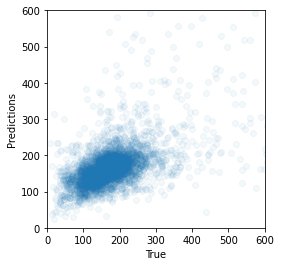

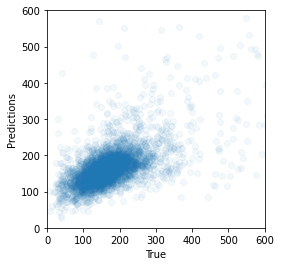

--------
BertAveraging


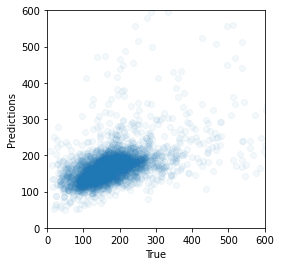

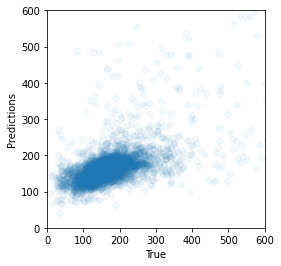

--------
BertSequence


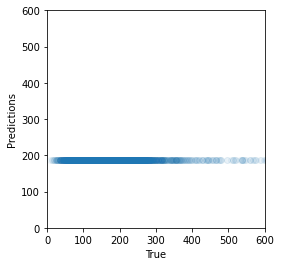

/home/ruecker/miniconda3/envs/GPU/lib/python3.7/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/ruecker/miniconda3/envs/GPU/lib/python3.7/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


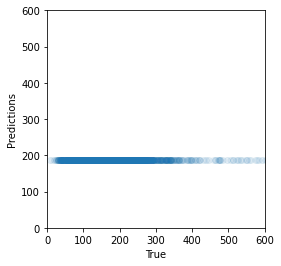

/home/ruecker/miniconda3/envs/GPU/lib/python3.7/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/ruecker/miniconda3/envs/GPU/lib/python3.7/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


--------
BertTextlength


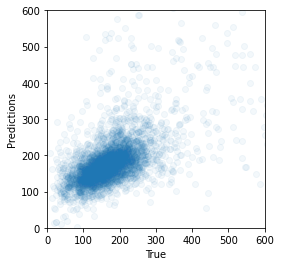

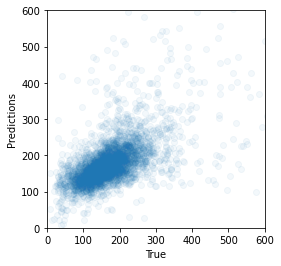

--------
BertHiM400


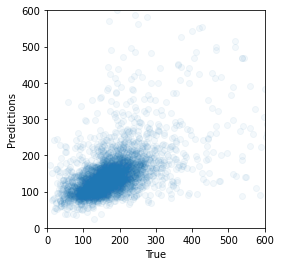

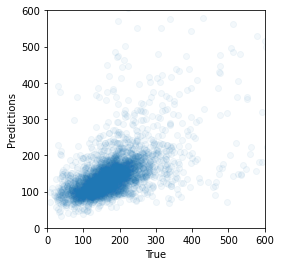

--------
BertHiM512


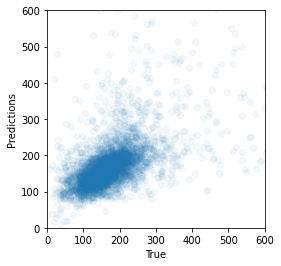

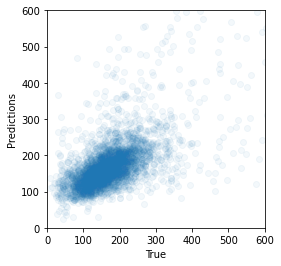

--------
BertHiM512pre


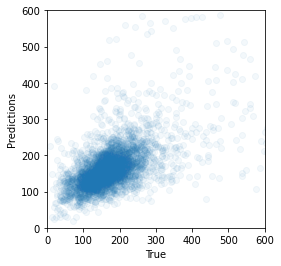

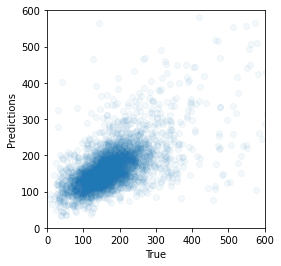

--------
BertHiGRU400


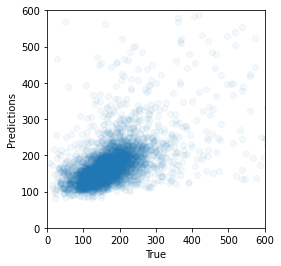

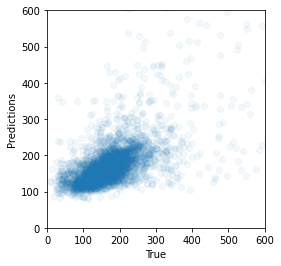

--------
BertHiGRU512


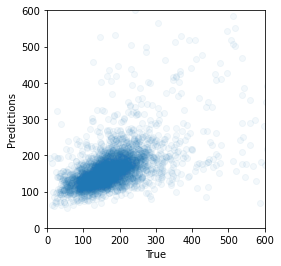

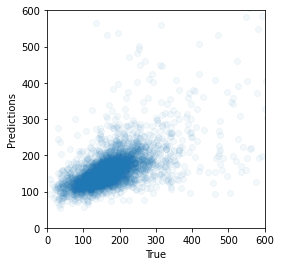

--------
BertHiGRU512pre


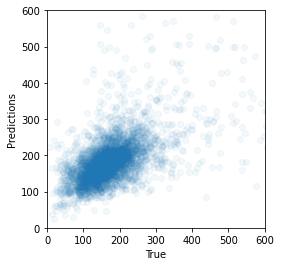

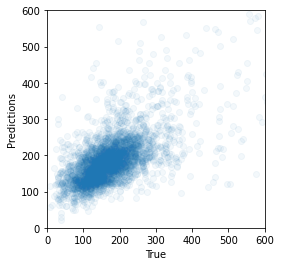

--------
CNN800


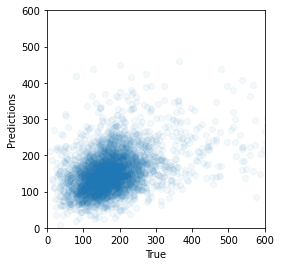

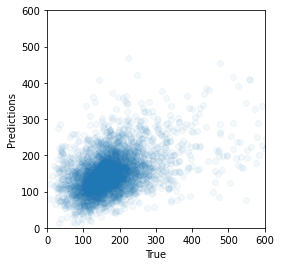

--------
BertEmbsFFN


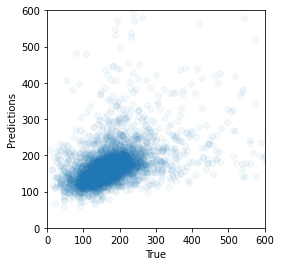

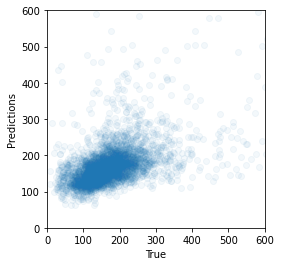

--------
DANFFN


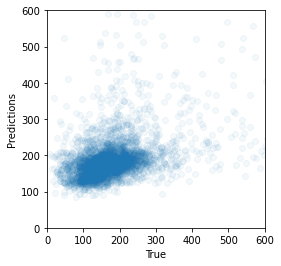

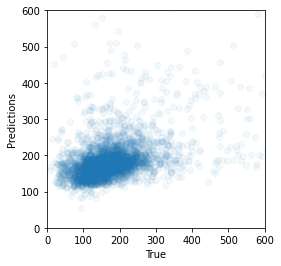

--------
DANRidge


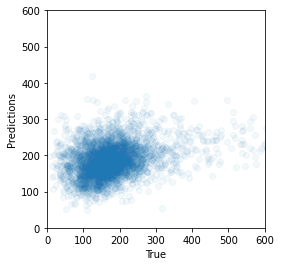

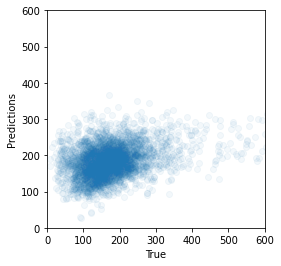

--------
BertEmbsRidge


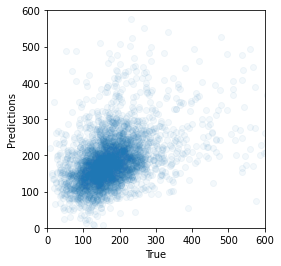

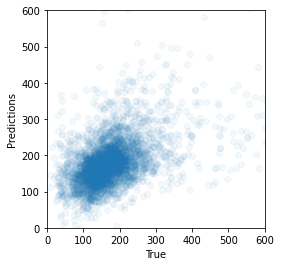

--------
BaselineTextlength


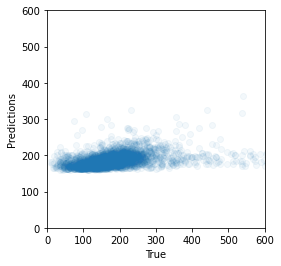

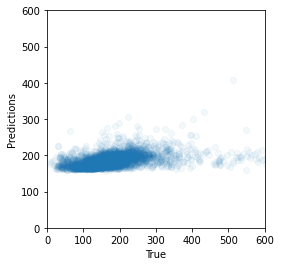

--------
BaselineMean


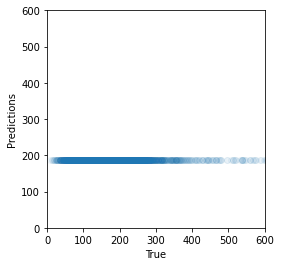

/home/ruecker/miniconda3/envs/GPU/lib/python3.7/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/ruecker/miniconda3/envs/GPU/lib/python3.7/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


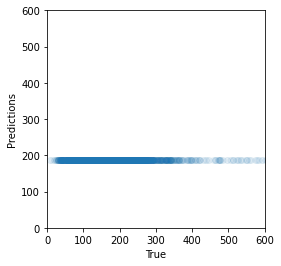

--------
BOWRidge


/home/ruecker/miniconda3/envs/GPU/lib/python3.7/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/ruecker/miniconda3/envs/GPU/lib/python3.7/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


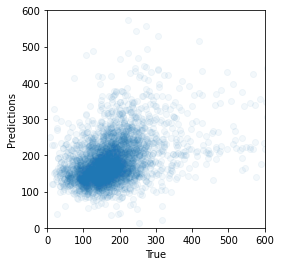

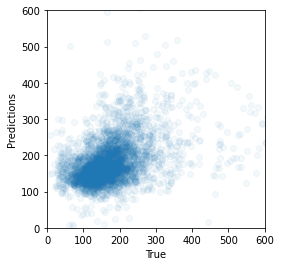

--------


In [756]:
for name, identifier in models_dict.items():
    print(name)
    pred_dev = pd.read_csv(PATH_predictions / "dev" / identifier, index_col = 0, sep = '\t')
    pred_test = pd.read_csv(PATH_predictions / "test" / identifier, index_col = 0, sep = '\t')
    
    rt_dev = compare(pred_dev.true, pred_dev.pred, scatter = True)
    rt_test = compare(pred_test.true, pred_test.pred, scatter = True)
    
    print("--------")